In [206]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
from math import e
plt.style.reload_library()
plt.style.use(['science', 'grid'])
import ipywidgets as widgets

In [273]:
# DEFINING FITTING FUNCTIONS USED FOR THIS LAB ---------------------------------------
def proportionality(x,a):
    return a*x

def linear(x,a,b):
    return a*x + b

def powerLaw(x,a,b):
    return a*x**b

def expLaw(x,a,b):
    return a*e**(b*x)

def LinearPlot(xdata,ydata,error,a,b,title,function,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error,capsize = 10,marker = 'o',markersize=1, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.title(title, fontsize = 18)
    plt.legend(prop={'size': 15}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def ScatterPlot(xdata,ydata,error,title,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error,capsize = 5,marker = 'o',markersize=3, linestyle = 'None',color='black')
    plt.plot(xdata,ydata,color=color)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.title(title, fontsize = 18)
    plt.xticks(fontsize=15)
    plt.xlim([10, 61])
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")

In [284]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1GSmmOErJf7F4YjNmXeUkfH1FiBiIOD_8ImiHSWNrcEA'
workSheetName = 'Lab'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
#df = df.apply(lambda x: pd.Series(x.dropna().values))
#df = df.fillna('')
df

,Angle (°),L (m),10T (s),T (s),$T^2 (s^2)$,Error(T),Error(T^2),Conditions
0,9.73,0.381,11.53,1.153,1.329409,0.00826,0.019048,Fixed angle
1,9.73,0.665,16.50,1.650,2.722500,0.00826,0.027258,Fixed angle
2,9.73,1.065,20.65,2.065,4.264225,0.00826,0.034114,Fixed angle
3,9.73,1.335,23.22,2.322,5.391684,0.00826,0.038359,Fixed angle
4,9.73,1.606,25.50,2.550,6.502500,0.00826,0.042126,Fixed angle


In [286]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error = widgets.Dropdown(options=filenames,
                                description='Error',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', 'Angle (°)', 'L (…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', 'Angle (°)', 'L (…

Dropdown(description='Error', layout=Layout(width='max-content'), options=('Select Column', 'Angle (°)', 'L (m…

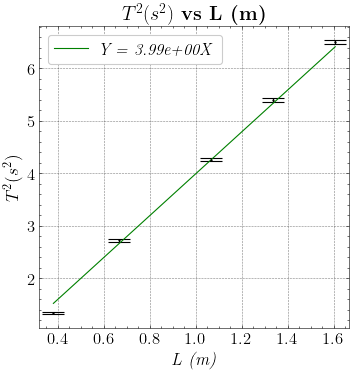

In [287]:
# FITTING THE DATA USING A LINEAR RELATIONSHIP ---------------------------------------
xdata, ydata, error = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error.value]
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata, sigma = error)
perr = np.sqrt(np.diag(covariance))

#Calculate the error on the fits from the covariacne matrix
slope = parameters[0]
slope_error = perr[0]

if parameters.shape[0] > 1: 
    b = parameters[1] 
    b_error = perr[1]
else:
    b = 0
    b_error = 0

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{' + drop_down_y.value + ' vs ' + drop_down_x.value + '}$'
LinearPlot(xdata,ydata,error,slope,b,title,proportionality,'green',drop_down_x.value,drop_down_y.value)

In [239]:
print('slope_error = ' + "{:.4e}".format(slope_error))
print('b_error = ' + "{:.4e}".format(b_error))

slope_error = 7.8685e-02
b_error = 0.0000e+00


In [279]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
workSheetName = 'constantLength'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df_time = pd.read_csv(URL)
df_time

,$\theta$ ($^\circ$),L (cm),10T (sec),T (s),Error T,Conditions
0,12.5,133.5,23.34,2.334,0.00826,Fixed length
1,15.0,133.5,23.34,2.334,0.00826,Fixed length
2,17.5,133.5,23.43,2.343,0.00826,Fixed length
3,20.0,133.5,23.47,2.347,0.00826,Fixed length
4,25.0,133.5,23.47,2.347,0.00826,Fixed length
5,30.0,133.5,23.72,2.372,0.00826,Fixed length
6,35.0,133.5,23.72,2.372,0.00826,Fixed length
7,40.0,133.5,23.84,2.384,0.00826,Fixed length
8,50.0,133.5,24.10,2.410,0.00826,Fixed length
9,55.0,133.5,24.47,2.447,0.00826,Fixed length


In [281]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df_time.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error = widgets.Dropdown(options=filenames,
                                description='Error',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$\\theta$ ($^\\c…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$\\theta$ ($^\\c…

Dropdown(description='Error', layout=Layout(width='max-content'), options=('Select Column', '$\\theta$ ($^\\ci…

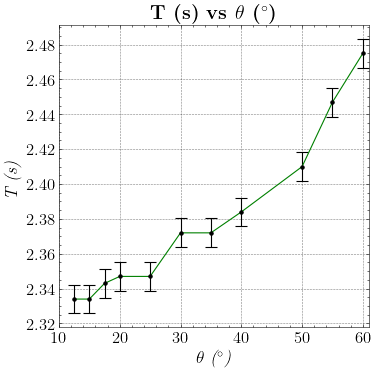

In [282]:
# FITTING THE DATA USING A POWER-LAW RELATIONSHIP ---------------------------------------
xdata, ydata, error = df_time[drop_down_x.value], df_time[drop_down_y.value], df_time[drop_down_error.value]
parameters, covariance = opt.curve_fit(linear, xdata, ydata, sigma = error)
perr = np.sqrt(np.diag(covariance))

#Calculate the error on the fits from the covariacne matrix
slope = parameters[0]
slope_error = perr[0]

if parameters.shape[0] > 1: 
    b = parameters[1] 
    b_error = perr[1]
else:
    b = 0
    b_error = 0
    
# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{' + drop_down_y.value + ' vs ' + drop_down_x.value + '}$'
ScatterPlot(xdata,ydata,error,title,'green',drop_down_x.value,drop_down_y.value)

## HERE STARTS THE LAB DATA TREATMENT ------------------

In [261]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
workSheetName = 'TimeUncertainty'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df_time = pd.read_csv(URL)
df_time

,10T (sec)
0,20.65
1,20.59
2,20.63
3,20.56
4,20.44


In [222]:
# DETERMINING THE REACTION TIME 
std = df_time['T (sec)'].std()/10
print("The standard deviation of our time measurement is: ΔT = " + "{:.5f}".format(std) + " sec.")

The standard deviation of our time measurement is: ΔT = 0.00826 sec.


In [288]:
# DETERMING THE VALUE OF g WITH ITS UNCERTAINTY
g_exp = (4*pi**2)/slope
g_error = ((4*pi**2)/slope**2)*slope_error
units = 'm/s^2'
print('Experimental result: g = ' + "{:.4f}".format(g_exp) + ' ± ' + "{:.4f}".format(g_error) + ' ' + units)

Experimental result: g = 9.8838 ± 0.1947 m/s^2
